<a href="https://colab.research.google.com/github/Zafeerahamad/TSF-Solution/blob/main/Sol1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data_frame=pd.read_csv('http://bit.ly/w-data')
print('Our data is SuccessFully  Inserted')
data_frame.head()

Our data is SuccessFully  Inserted


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


 **Preparation of the data** 

In [ ]:
x = data_frame.iloc[:, :-1].values  
y = data_frame.iloc[:, 1].values  

 **VISUALISATION**
 
Now we are going to see which type of relationship the features have

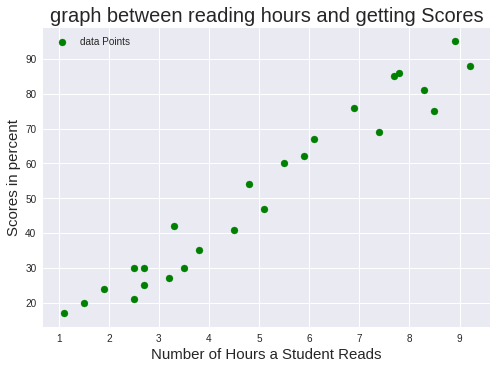

In [ ]:

plt.style.use('seaborn')
plt.scatter(x, y,c='green',label='data Points')
plt.xlabel("Number of Hours a Student Reads",fontdict={'size':15})
plt.ylabel("Scores in percent",fontdict={'size':15})
plt.legend()
plt.title("graph between reading hours and getting Scores",fontdict={'size':20})
plt.show()

After visualisation we can clearly see that **Scores** and **Hours** are linearly related means as reading hours increase Scores are also increases.
So this is a problem of **Simple Linear Regression**

# Splitting the dataset into training and testing data
 in training phase we will break our dataset into two part, One is training data and other is testing data 

 This is Done with the help of **Sklearn.model_selection** library

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

# now our test size will be 20% of the total x size
train_x 

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
train_y

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [ ]:
train_x.shape

(20, 1)

#**Trainig with the help of the predefine Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(train_x,train_y)
print("Our Training is Completed now")

Our Training is Completed now


In [ ]:
coef=regressor.coef_    # this is the regression coefficiant
intercept = regressor.intercept_  # this is the intercept
intercept,coef

(2.018160041434662, array([9.91065648]))

In [ ]:
line= coef*x + intercept  # line is the prediction line for every x data
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

 **Plotting of the Best fit line**

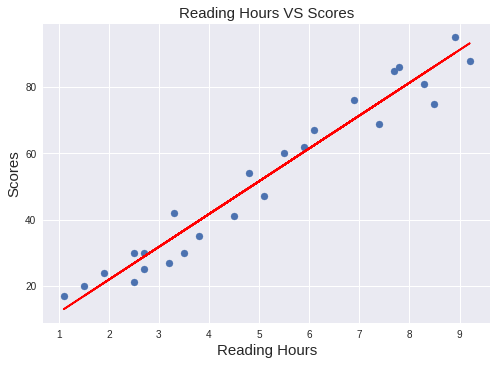

In [ ]:
plt.plot(x,line,c='red',label="predicted_line")
plt.scatter(x,y)
plt.xlabel("Reading Hours",fontdict={'size':15})
plt.ylabel("Scores",fontdict={'size':15})
plt.title('Reading Hours VS Scores',fontdict={'size':15})
plt.show()

# Prediction 
now we make our predictions

In [ ]:
y_pred=regressor.predict(test_x)
print(y_pred)
test_x
regressor.coef_

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


array([9.91065648])

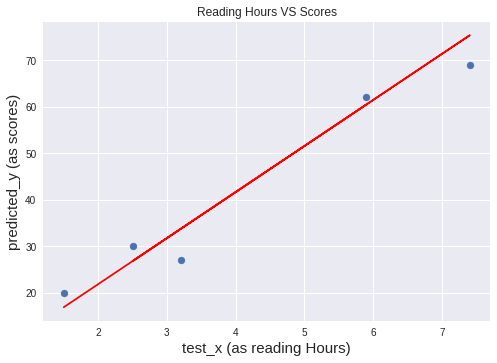

In [ ]:
# Plotting between test_x and predicted Y
plt.plot(test_x,y_pred,c='red')
plt.scatter(test_x,test_y)
plt.xlabel('test_x (as reading Hours)',fontdict={'size':15})
plt.ylabel('predicted_y (as scores)',fontdict={'size':15})
plt.title('Reading Hours VS Scores')
plt.show()

**we can also test with our own data**

In [ ]:

hours=[float(i) for i in input("Enter your reading hours--").split()]
hours=np.array(hours).reshape(-1,1)
#hours=np.array(9.25).reshape(1,1)
our_predic=regressor.predict(hours)
print(our_predic)

Enter your reading hours--5
[51.57144244]


###What will be the score If a Student reads **9.25 hours/day**

In [ ]:
hours=[[9.25]]
pred=regressor.predict(hours)
print(pred)

[93.69173249]


#mean_absolute erro on test_set and training set

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error on test_data is {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean Absolute Error on test_data is {}".format(mean_absolute_error(train_y,regressor.predict(train_x))))




Mean Absolute Error on test_data is 4.183859899002982
Mean Absolute Error on test_data is 5.186601709180373


#**Trainig with the help of user define function**

In [ ]:
# FOR BIAS term we have to add one more column in the begining of the x
one=np.ones((x.shape[0],1))
x=np.hstack((one,x))

In [ ]:



def hypothesis(X,theta):   # where x is the single example with n feature
              
    
    return np.dot(X,theta)

def error(X,Y,theta):
    m=X.shape[0]
    y_=hypothesis(X,theta)
    error=np.sum((y_-Y)**2)
    return error/m

def gradient(X,Y,theta):
    m,n=X.shape
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-Y))

    return grad/m


def gradient_descent(X,Y,lr=0.06,max_echos=100):
    theta=np.zeros((X.shape[1]))
    #print(theta)
    m,n=X.shape
    error_list=[]
    theta_list=[]

    for i in range(max_echos):
        e=error(X,Y,theta)
  
        theta_list.append(theta)
        error_list.append(e)
        grad=gradient(X,Y,theta)
        theta=theta-lr*grad
    return theta,error_list,theta_list
        

    
            
                                                                                         

# we can also see the time taken by the gradient decscent method

In [ ]:

import time
start=time.time()
theta,error_list,theta_list=gradient_descent(x,y)
end=time.time()
print('time taken by gradient descent',end-start)


time taken by gradient descent 0.008746623992919922


# Iterative plot 

this plot will show how theta changes and how we get best_fit line

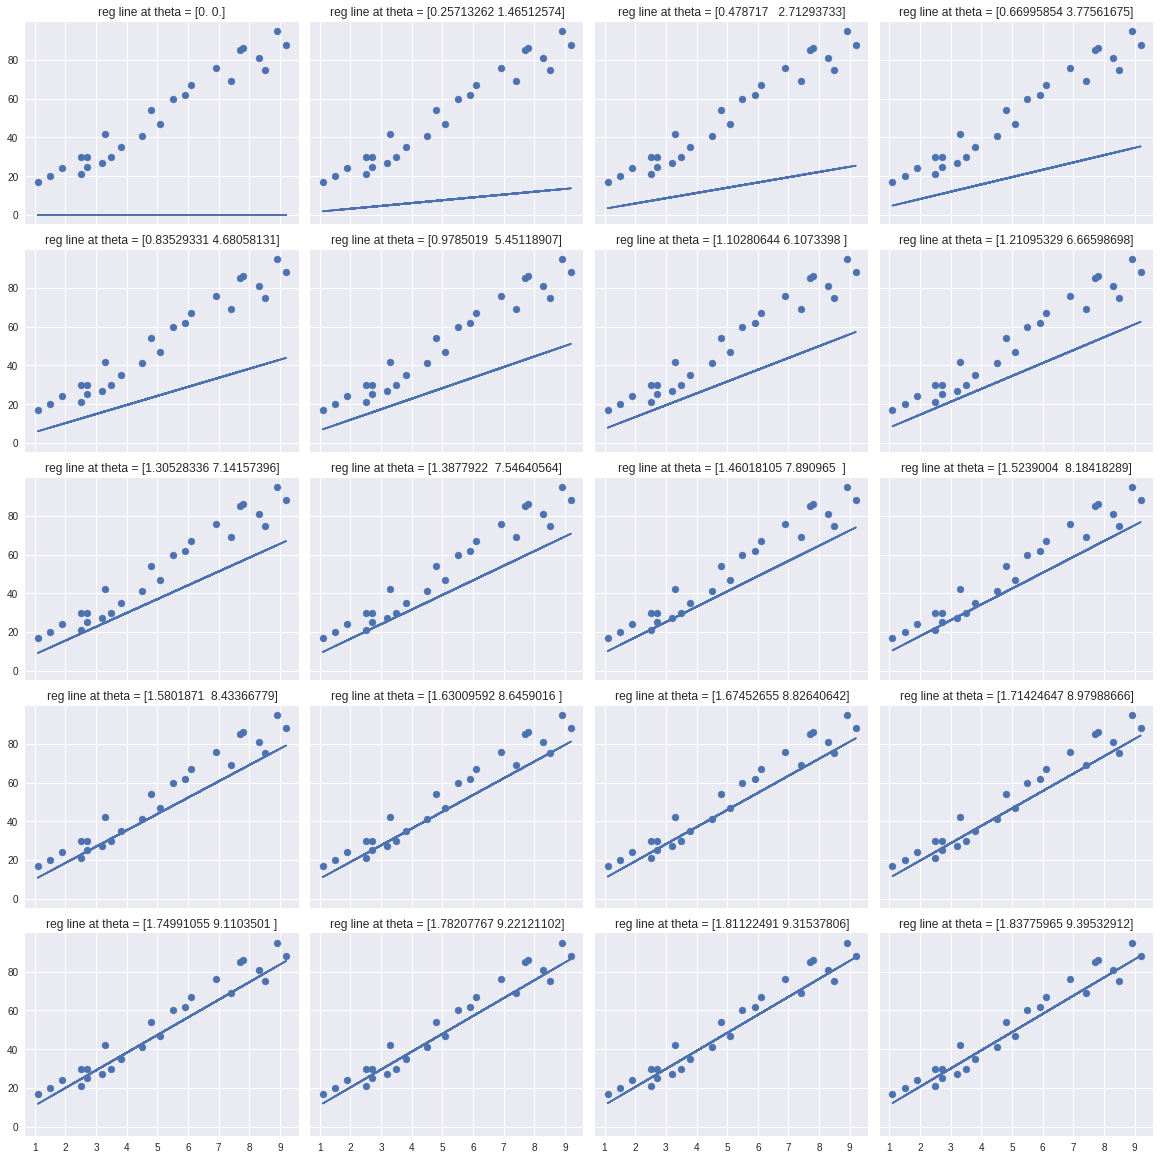

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(5,4,figsize=(16,16),sharex=True,sharey=True,constrained_layout=True)
index=0
theta_list=theta_list[:41]
for axes in ax:
  for axis in axes:
    theta=theta_list[index]
    line=theta[1]*x[:,1]+theta[0]
    axis.plot(x[:,1],line)
    axis.scatter(x[:,1],y)
    #axis.set_xticks(True)
    axis.set_title(f"reg line at theta = {theta}")
    index+=2
   
plt.show()

In [ ]:
theta  # theta[0] is the intercept And theta[1] is the coefficient

array([1.83775965, 9.39532912])

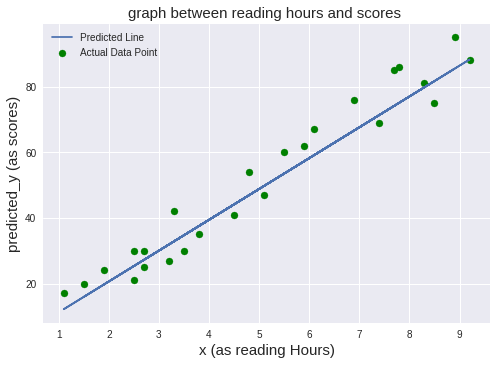

In [ ]:
reg_line=x[:,1]*theta[1]+theta[0]
plt.plot(x[:,1],reg_line,label='Predicted Line')
plt.scatter(x[:,1],y,c='green',label='Actual Data Point')
plt.xlabel('x (as reading Hours)',fontdict={'size':15})
plt.ylabel('predicted_y (as scores)',fontdict={'size':15})
plt.title("graph between reading hours and scores ",fontdict={'size':15})
plt.legend()
plt.show()

#This visualisation shows how the error decreases as the number of ephocs increases
**epochs** means:in one epoch all the record in the dataset is getting updated

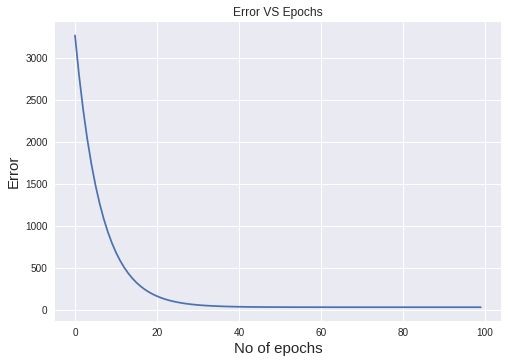

In [ ]:
plt.plot(error_list)
plt.xlabel('No of epochs',fontdict={'size':15})
plt.ylabel('Error',fontdict={'size':15})
plt.title('Error VS Epochs')
plt.show()


# Prediction with user_defined model

In [ ]:
y_prediction=np.dot(x,theta)
y_prediction

array([25.32608244, 49.75393814, 31.90281282, 81.69805714, 34.72141156,
       15.93075333, 88.27478752, 53.51206979, 79.81899131, 27.20514826,
       74.18179384, 57.27020144, 44.11674067, 32.84234573, 12.17262168,
       85.45618878, 25.32608244, 19.68888497, 59.14926726, 71.36319511,
       27.20514826, 46.93533941, 37.54001029, 66.66553055, 75.12132676])